# ACE_krill dataset depth and speed study

## Data description

Data collected during the Antarctic Circumnavigation Expedition (ACE) in 2017 using an EK80 echosounder running at a frequency of 200 kHz.

## Objective

Design and test functions for the computation of depths and speeds in the echogram

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
import skimage
import skimage.exposure

## Import data



We import the csv file.

In [9]:
data_path = '/home/benjamin/Documents/datascience/ACE/'
df = pd.read_csv(data_path+'ACE_-D20170207-T104031.sv.csv', delimiter=',', skipinitialspace=True)

We separate the data into 2 objects:
* info_df: a dataframe with the information about the pings
* data: an array with the echogram data (the sv1, sv2, sv3,... columns).

Each sv* column corresponds to a particular depth in the ocean.
The Sv* values form what we call an echogram (a group of pixels which forms an echosounder image).
The value for each cell is the logarithm of the intensity of the echo (ratio of the backscattered and the incident intensities).

In [28]:
info_df = df.iloc[:,:13]
data= np.array(df.iloc[:,13:]).transpose()

In [29]:
info_df

,Ping_index,Distance_gps,Distance_vl,Ping_date,Ping_time,Ping_milliseconds,Latitude,Longitude,Depth_start,Depth_stop,Range_start,Range_stop,Sample_count
0,0,0.000000,59.396000,2017-02-07,10:40:31,736,0.000000,0.000000,0.09279,499.858436,0.09279,499.858436,2693
1,1,0.000000,59.399222,2017-02-07,10:40:33,136,0.000000,0.000000,0.09279,499.858436,0.09279,499.858436,2693
2,2,0.001886,59.402626,2017-02-07,10:40:34,526,-68.691517,-177.779374,0.09279,499.858436,0.09279,499.858436,2693
3,3,0.005417,59.406177,2017-02-07,10:40:35,925,-68.691576,-177.779378,0.09279,499.858436,0.09279,499.858436,2693
4,4,0.008963,59.409832,2017-02-07,10:40:37,316,-68.691635,-177.779385,0.09279,499.858436,0.09279,499.858436,2693
5,5,0.012520,59.413314,2017-02-07,10:40:38,707,-68.691694,-177.779392,0.09279,499.858436,0.09279,499.858436,2693
6,6,0.016058,59.416880,2017-02-07,10:40:40,97,-68.691753,-177.779402,0.09279,499.858436,0.09279,499.858436,2693
7,7,0.019569,59.420507,2017-02-07,10:40:41,487,-68.691812,-177.779413,0.09279,499.858436,0.09279,499.858436,2693
8,8,0.023052,59.423981,2017-02-07,10:40:42,878,-68.691870,-177.779421,0.09279,499.858436,0.09279,499.858436,2693
9,9,0.044926,59.445000,2017-02-07,10:40:51,221,-68.692234,-177.779462,0.09279,499.858436,0.09279,499.858436,2693


In [41]:
data.shape

(2695, 9163)

## Speed and distance

Test on the computation of the distance using the latitude and longitude.
There is a problem as we do not have the formula giving the length from the degrees in longitude.

In [30]:
km_per_degree = 55#111.319  depends on the longitude!!
vect_lat1 = info_df['Latitude']
vect_lat2 = np.zeros(len(vect_lat1))
vect_lat2[0:-1] = vect_lat1[1:]
delta_lat = (vect_lat1-vect_lat2)
vect_long1 = info_df['Longitude']
vect_long2 = np.zeros(len(vect_long1))
vect_long2[0:-1] = vect_long1[1:]
delta_long = (vect_long1-vect_long2)

km_per_miles = 1.852
delta_dist = np.sqrt((delta_lat*2)**2+delta_long**2)*km_per_degree/km_per_miles
delta_dist[1]=0
delta_dist[len(delta_dist)-1]=0
dist_vect = np.cumsum(delta_dist)

<IPython.core.display.Javascript object>


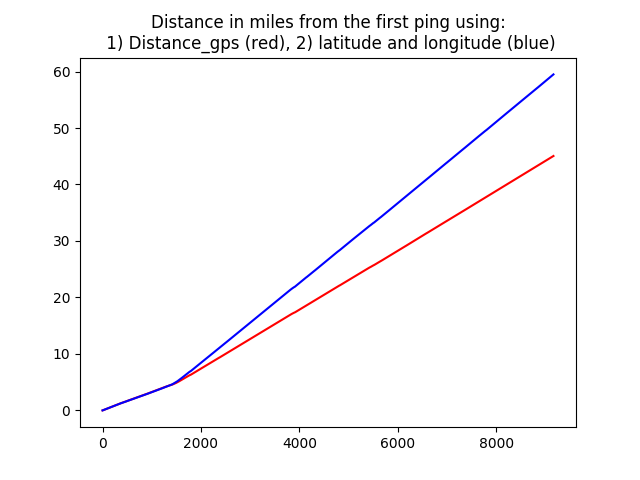

In [31]:
#plt.plot(df['Distance_vl'])
plt.plot(info_df['Distance_gps'],color='r')
plt.plot(dist_vect,color='b')
plt.title('Distance in miles from the first ping using:\n 1) Distance_gps (red), 2) latitude and longitude (blue)')
plt.show()

'Distance_gps' seems to be computed from the values of the latitude and longitude, but with the correct formula. Let us trust this value for the analysis.

Test of the speed computation in the ACE_box

In [32]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [33]:
ACE_box.speed_at_sample(1000,df)

10.59220704475533

In [35]:
speeds = [ACE_box.speed_at_sample(s,info_df) for s in range(len(info_df['Ping_index']))]

In [36]:
from scipy.signal import butter,filtfilt
order,cutf=5,0.1
b, a = butter(order, cutf, 'low')
speeds_filt = filtfilt(b, a, speeds)

<IPython.core.display.Javascript object>


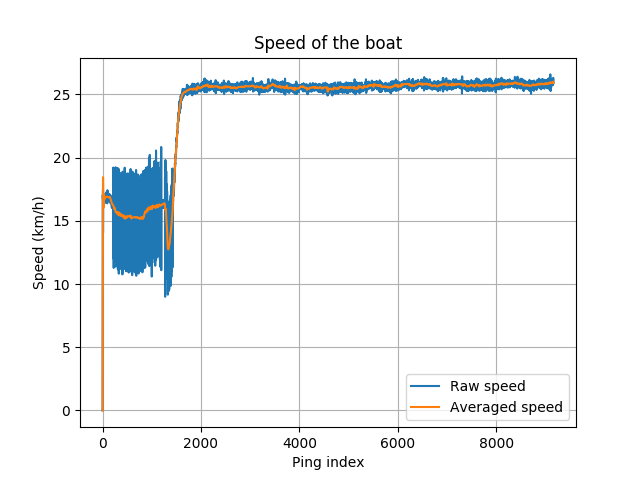

In [37]:
plt.figure()
plt.plot(speeds,label='Raw speed')
plt.plot(speeds_filt,label='Averaged speed')
plt.title('Speed of the boat')
plt.xlabel('Ping index')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.grid()
plt.show()

Same thing using the toolbox ACE_box

<IPython.core.display.Javascript object>


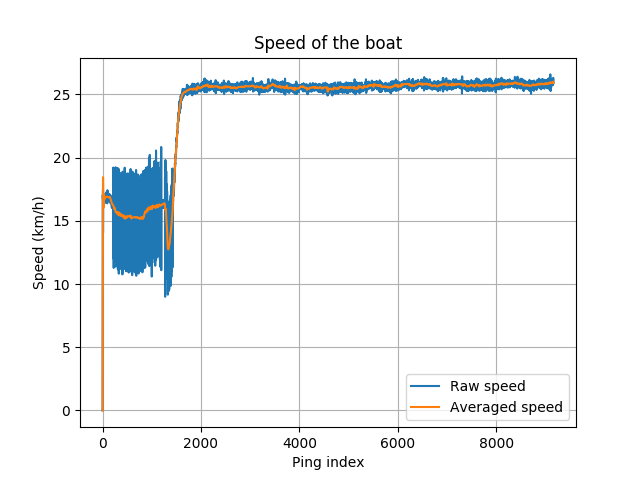

In [38]:
info_df['speeds'],info_df['speeds_averaged'] = ACE_box.extract_speeds(info_df)
ACE_box.plot_speeds(info_df)

## Depth

Preliminary tests

In [39]:
depth_variations = np.std(info_df['Depth_start'])+np.std(info_df['Depth_stop'])+np.std(info_df['Sample_count'])
if depth_variations > 1:
    print('Warning: there was a change in the depth per pixel!', depth_variations)

In [40]:
print('Start depth (in meters):',info_df['Depth_start'][0])
print('Stop depth (in meters):',info_df['Depth_stop'][0])
print('Nb of pixels along depth axis:',info_df['Sample_count'][0])
pixel_depth = (info_df['Depth_stop'][0] - info_df['Depth_start'][0])/info_df['Sample_count'][0]
print('Depth per pixel (in meters):',pixel_depth)

Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547


Test of the functions inside the ACE_box

In [14]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [4]:
depth_data = ACE_box.compute_depth_data(df)

Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547


In [5]:
depth_data

{'depth_per_pixel': 0.18557951954697363, 'depth_start': 8.4927897600000009}

In [42]:
data_trunc = ACE_box.cut_echogram(data,100,depth_data)

<IPython.core.display.Javascript object>


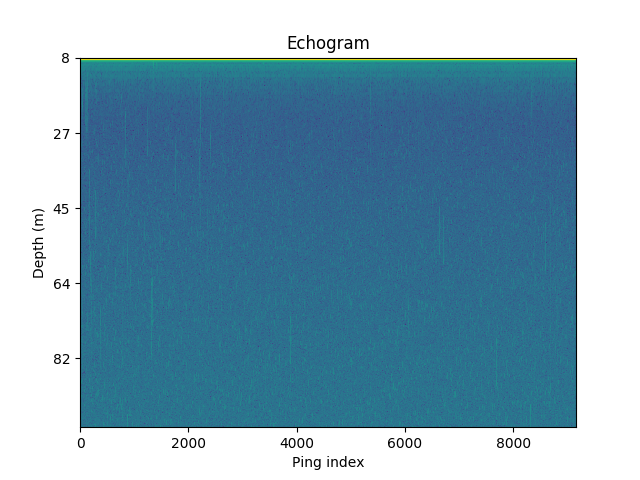

In [43]:
%matplotlib notebook
ACE_box.show_echogram(data_trunc,depth_data)